In [6]:
!pip install xlrd
!pip install fairlearn
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 3.3 MB/s eta 0:00:00


In [14]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#reading file
file_path = '/content/default of credit card clients (2).xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

X=df.drop(columns=['Unnamed: 0'])

# continue with preperation
X=X.drop(columns=['Y'])

#get list of feature names
feature_names= X.iloc[0].values
feature_names = np.array(feature_names)
X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


print(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

<ipython-input-8-c3388e2b6e24>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X3'] = X['X3'].replace({5: 4, 6: 4})


           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
1       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
2      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
3       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
4       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
5       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29996  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29997  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29998   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29999   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
30000   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [9]:
#will be needed for feature importance
print(feature_names)

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=43a9aeb0bc4f9262d6bd594ec831bab974137dff5624e042697938f09b4a2898
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

# Initialize models
model= RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)

explainer = LimeTabularExplainer(X_train.values, mode="classification")

results = {}

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba)

result = {
        "accuracy": accuracy,
        "classification_report": classification_report_output,
        "lime_explanation": explanation.as_list()
}



# Print results for each model
model_name="random forest"
print(f"{model_name} Results:")
print(f"Accuracy: {result['accuracy']:.2f}")
print("Classification Report:")
print(result['classification_report'])
print("LIME Explanation:")
print(result['lime_explanation'])
print("\n")


random forest Results:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4660
           1       0.68      0.34      0.45      1327

    accuracy                           0.82      5987
   macro avg       0.76      0.65      0.67      5987
weighted avg       0.80      0.82      0.79      5987

LIME Explanation:
[('-1.00 < 5 <= 0.00', -0.07151737715094961), ('0 <= 50000.00', 0.041910870080329704), ('-1.00 < 6 <= 0.00', -0.03173293605529052), ('-1.00 < 7 <= 0.00', -0.015120701473679781), ('-1.00 < 8 <= 0.00', -0.012438979485211802), ('-1.00 < 9 <= 0.00', -0.012419617602984193), ('20 <= 300.00', 0.012297323408990389), ('-1.00 < 10 <= 0.00', -0.010154316385445197), ('891.00 < 18 <= 2007.00', 0.010082975466801874), ('1280.00 < 16 <= 17041.00', -0.008262397609570874)]




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
importances = model.feature_importances_

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)
print(importances_df)

      Feature  Importance
5       PAY_0    0.233392
6       PAY_2    0.132732
7       PAY_3    0.068554
8       PAY_4    0.044274
17   PAY_AMT1    0.043755
0   LIMIT_BAL    0.038119
9       PAY_5    0.037408
10      PAY_6    0.036680
11  BILL_AMT1    0.036256
18   PAY_AMT2    0.031284
12  BILL_AMT2    0.031191
19   PAY_AMT3    0.030903
13  BILL_AMT3    0.029853
15  BILL_AMT5    0.027846
16  BILL_AMT6    0.027356
14  BILL_AMT4    0.026931
22   PAY_AMT6    0.026881
21   PAY_AMT5    0.026878
4         AGE    0.026564
20   PAY_AMT4    0.026371
2   EDUCATION    0.007849
3    MARRIAGE    0.004938
1         SEX    0.003983


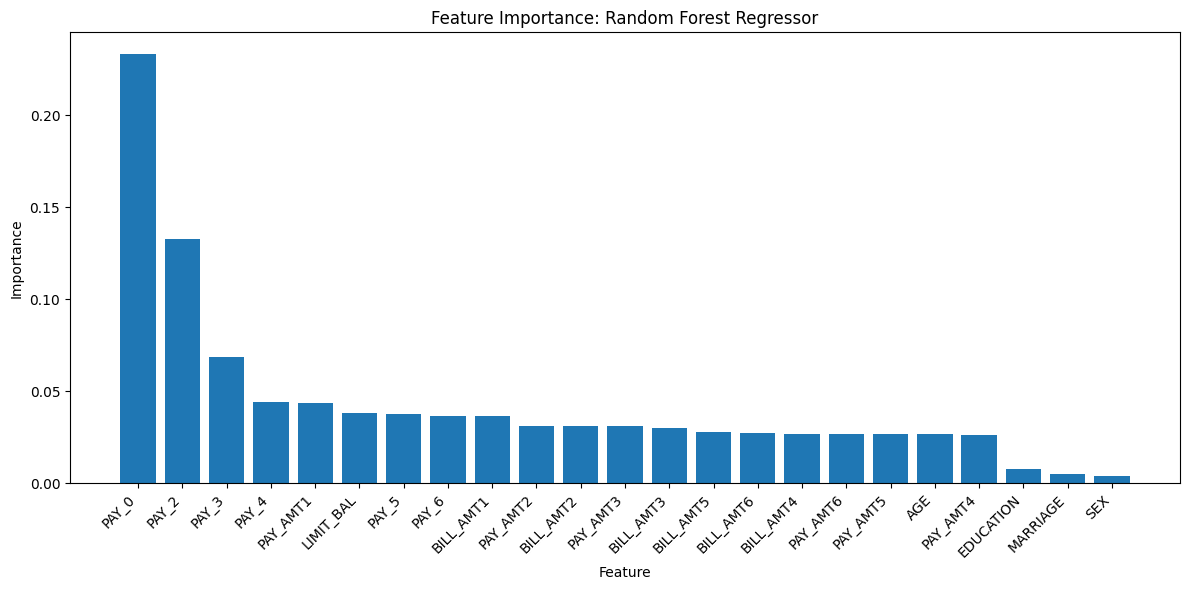

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest Regressor')
plt.tight_layout()
plt.show()